# DataBase Linear regression 

In [1]:
#ENV["PYTHON"]=""

""

In [1]:
using DataFrames
using GLM
using Plots

In [2]:
using LaTeXStrings

In [3]:
pyplot()

Plots.PyPlotBackend()

In [4]:
DataGolfo = readtable("BMPF-14junio2017Golfo.csv");
DataSUB = readtable("BMPF-14junio2017SUBxyoli.csv");
DataTMVB = readtable("BMPF-14junio2017TMVB.csv");

In [5]:
DataGolfo[:Magnitud]=round.(dropna(DataGolfo[:Magnitud]),1);
DataSUB[:Magnitud]=round.(dropna(DataSUB[:Magnitud]),1);
DataTMVB[:Magnitud]=round.(dropna(DataTMVB[:Magnitud]),1);

In [6]:
SUB = DataSUB[.~isna.(DataSUB[:freq_esc_]),:]; # Remove and Fc -->> NA
TMVB = DataTMVB[.~isna.(DataTMVB[:freq_esc_]),:]; # # Remove Fc -->> NA

# 1. Subduction zone Catalog

In [7]:
ReMwFc = fit(LinearModel,@formula(freq_esc_ ~ Magnitud),SUB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   9.51193  0.347446 27.3767   <1e-96
Magnitud     -1.39428 0.0950758 -14.665   <1e-39


In [8]:
fMwfc(x)=coef(ReMwFc)[2] * x + coef(ReMwFc)[1];
#x = collect(1:8);
x = SUB[:Magnitud];
corr = fMwfc(x);
#σ = coef(ReMwFc)[2];


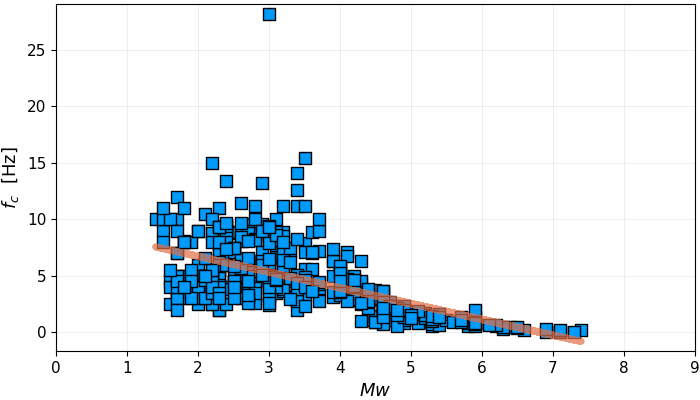

In [10]:
scatter((SUB[:Magnitud]),(SUB[:freq_esc_]),m=(8,:rect),
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,corr,linewidth=5,linealpha=0.7,leg=false)
#plot!([corr corr],fillrange=[corr+σ,corr-σ],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [11]:
SUB[:LogRa] = log10(SUB[:Radio]);
ReMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),SUB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.15505  0.0330622 -34.9356   <1e-99
Magnitud     0.229247 0.00904721   25.339   <1e-87


In [12]:
fMwRa(x)=coef(ReMwRad)[2] * x + coef(ReMwRad)[1];
x = SUB[:Magnitud];
rcorr = fMwRa(x);


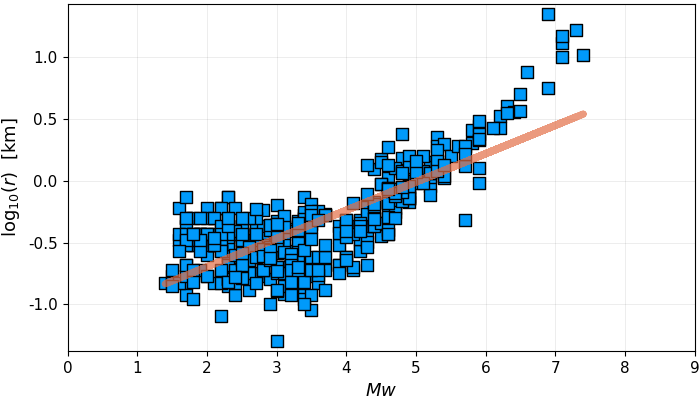

In [13]:
scatter((SUB[:Magnitud]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,rcorr,linewidth=5,linealpha=0.7,leg=false)
#plot!([rcorr rcorr],fillrange=[rcorr+σr,rcorr-σr],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsR-Regress.pdf",dpi=400)

In [14]:
SUB2 = SUB[(SUB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
SUB2[:LogD] = log10(SUB2[:Desplamiento]);
ReMwD = fit(LinearModel,@formula(LogD ~ Magnitud),SUB2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  -5.36934 0.0670598 -80.068   <1e-99
Magnitud     0.966816 0.0180232 53.6429   <1e-99


In [15]:
fMwD(x)=coef(ReMwD)[2] * x + coef(ReMwD)[1];
x = SUB2[:Magnitud];
dcorr = fMwD(x);


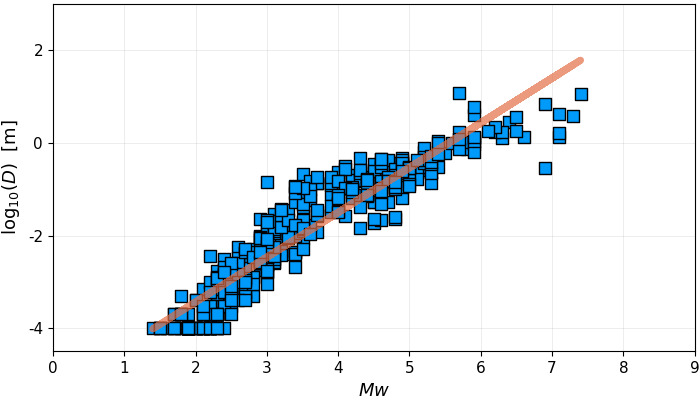

In [16]:
scatter((SUB2[:Magnitud]),(SUB2[:LogD]), m=(8,:rect),leg=false,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,dcorr,linewidth=5,linealpha=0.7)
#plot!([dcorr dcorr],fillrange=[dcorr+σd,dcorr-σd],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsDRegress.pdf",dpi=400)

# 2. Golfo of Baja California Catalog

In [18]:
ReGolMwFc = lm(@formula(freq_esc_ ~ Magnitud),DataGolfo)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   14.0548  0.265168  53.0034   <1e-99
Magnitud     -2.62695  0.146923 -17.8797   <1e-50


In [19]:
GolfMwfc(x)=coef(ReGolMwFc)[2] * x + coef(ReGolMwFc)[1];
x = DataGolfo[:Magnitud];
GolcorrF = GolfMwfc(x);


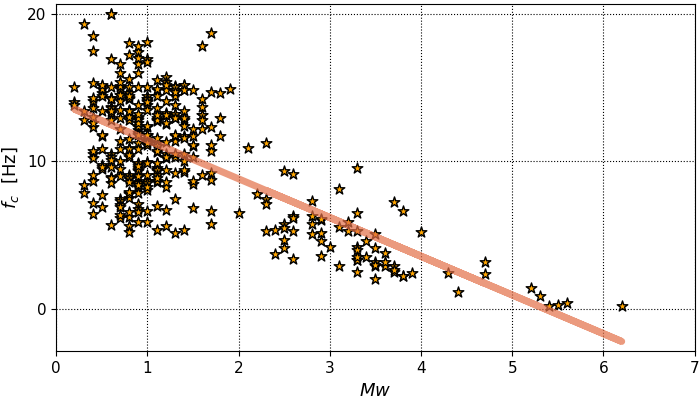

In [21]:
scatter((DataGolfo[:Magnitud]),(DataGolfo[:freq_esc_]),m=(8,:star5,:orange),
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,GolcorrF,linewidth=5,linealpha=0.7,leg=false)
#plot!(x,[GolcorrF GolcorrF],fillrange=[GolcorrF+err,GolcorrF-err],fillalpha=0.8,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [22]:
DataGolfo[:LogRa] = log10(DataGolfo[:Radio]);
ReGolMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),DataGolfo)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.38045  0.0158827 -86.9151   <1e-99
Magnitud     0.255237 0.00880023  29.0034   <1e-95


In [23]:
GolMwRad(x)=coef(ReGolMwRad)[2] * x + coef(ReGolMwRad)[1];
x = DataGolfo[:Magnitud];
GolcorrRad = GolMwRad(x);
#σFGol = stderr(ReGolMwRad)[2];
#err = sqrt(sum((DataGolfo[:LogRa] - GolcorrRad).^2)/length(GolcorrF))


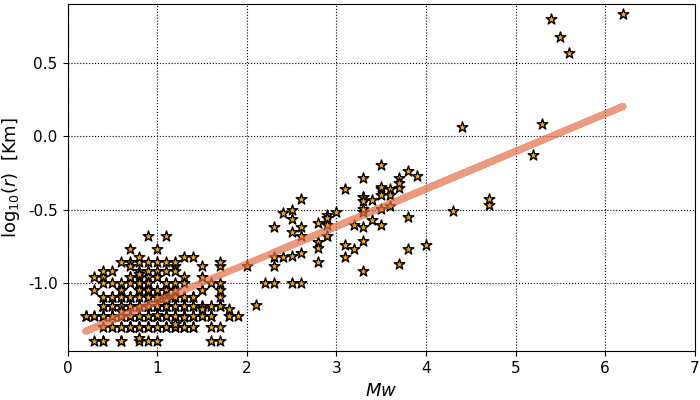

In [24]:
scatter((DataGolfo[:Magnitud]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,GolcorrRad,linewidth=5,linealpha=0.7,leg=false)

In [25]:
Golf2 = DataGolfo[(DataGolfo[:Desplamiento]) .> 0,:]; # Remove Despla <  0
Golf2[:LogD] = log10(Golf2[:Desplamiento]);
ReGolMwD = fit(LinearModel,@formula(LogD ~ Magnitud),Golf2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.89782 0.0341321 -143.496   <1e-99
Magnitud     0.911625 0.0189118  48.2041   <1e-99


In [26]:
GolMwD(x)=coef(ReGolMwD)[2] * x + coef(ReGolMwD)[1];
x = Golf2[:Magnitud];
GolcorrD = GolMwD(x);


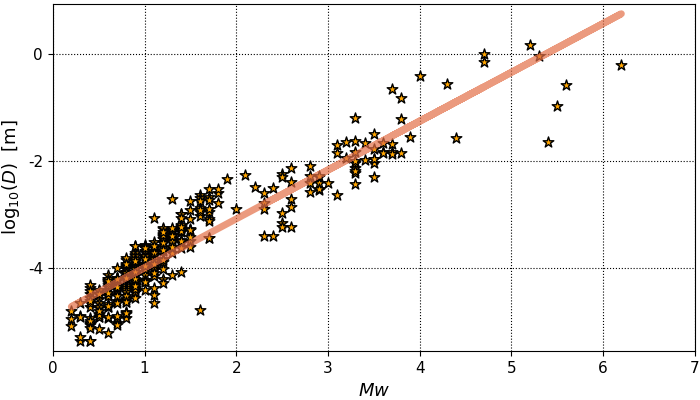

In [27]:
scatter((Golf2[:Magnitud]),(Golf2[:LogD]),m=(8,:star5,:orange),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,GolcorrD,linewidth=5,linealpha=0.7,leg=false)

# 3. TMVB Catalog

In [28]:
ReTMVBMwFc = fit(LinearModel,@formula(freq_esc_ ~ Magnitud),TMVB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   14.3905   1.52304  9.44853   <1e-14
Magnitud     -3.14853  0.461065 -6.82883    <1e-9


In [29]:
TMVBMwfc(x)=coef(ReTMVBMwFc)[2] * x + coef(ReTMVBMwFc)[1];
x = TMVB[:Magnitud];
TMVBcorrF = TMVBMwfc(x);


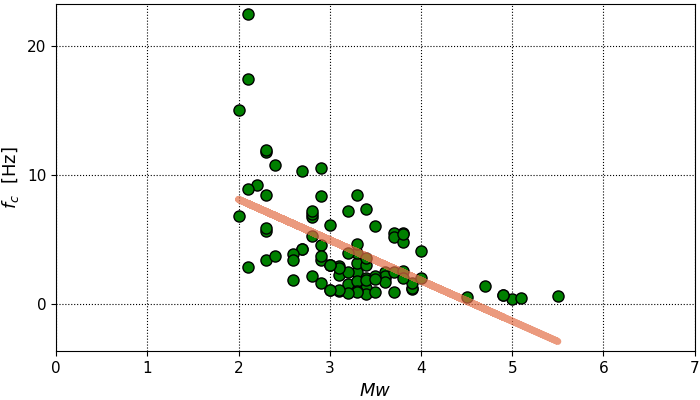

In [30]:
scatter((TMVB[:Magnitud]),(TMVB[:freq_esc_]),m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,TMVBcorrF,linewidth=5,linealpha=0.7,leg=false)

In [31]:
TMVB[:LogRa] = log10(TMVB[:Radio]);
ReTMVBMwRad = fit(LinearModel,@formula(LogRa ~ Magnitud),TMVB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -1.66291  0.127588 -13.0334   <1e-21
Magnitud     0.406094 0.0386244  10.5139   <1e-16


In [32]:
TMVBMwRad(x)=coef(ReTMVBMwRad)[2] * x + coef(ReTMVBMwRad)[1];
x = TMVB[:Magnitud];
TMVBcorrRad = TMVBMwRad(x);


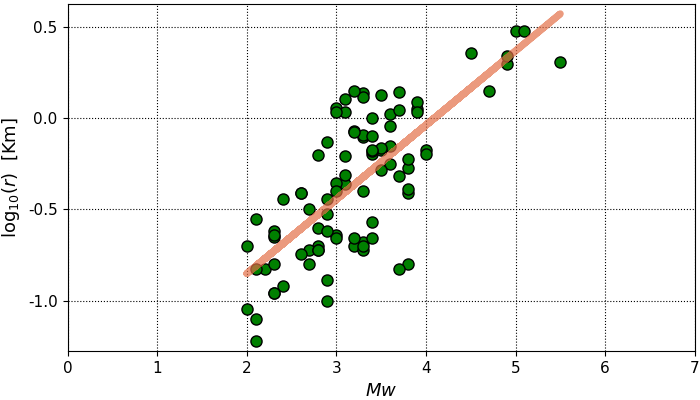

In [33]:
scatter((TMVB[:Magnitud]),(TMVB[:LogRa]),m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,TMVBcorrRad,linewidth=5,linealpha=0.7,leg=false)

In [34]:
TMVB2 = TMVB[(TMVB[:Desplamiento]) .> 0,:]; # Remove Despla <  0
TMVB2[:LogD] = log10(TMVB2[:Desplamiento]);
ReTMVBMwD = fit(LinearModel,@formula(LogD ~ Magnitud),TMVB2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.51779  0.270541 -16.6991   <1e-28
Magnitud     0.663164 0.0818999  8.09726   <1e-11


In [35]:
TMVBMwD(x)=coef(ReTMVBMwD)[2] * x + coef(ReTMVBMwD)[1];
x = TMVB2[:Magnitud];
TMVBcorrD = TMVBMwD(x);


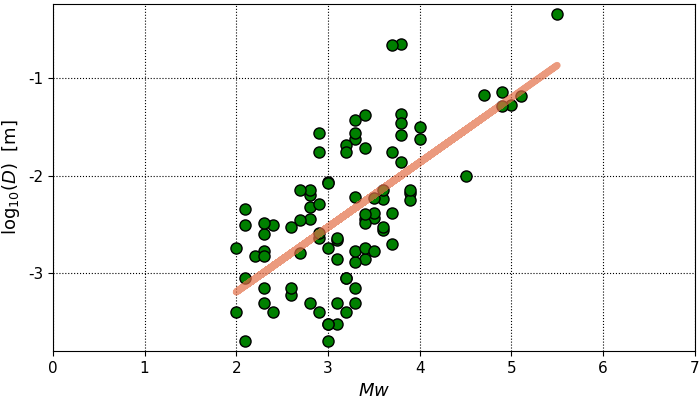

In [36]:
scatter((TMVB2[:Magnitud]),(TMVB2[:LogD]),m=(8,:circle,:green),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(x,TMVBcorrD,linewidth=5,linealpha=0.7,leg=false)